IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME 6 : un autre classifieur : Adaline, et visualisation de données

<font size="+1" color="RED"><b>[Q]</b></font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Manea Dorin-Mihai, 21302798

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-06</tt> et rajouter à la suite de <tt>tme-06</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-06-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

In [3]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev



# Bilan des séances précédentes

<div class="alert alert-block alert-warning">
Avant de commencer ce sujet, vous devez avoir terminé tous les TME précédents, si ce n'est pas le cas, consacrez le début de ce TME 6 à vous mettre à jour.
</div>    

# Un nouveau classifieur : ADALINE et la minimisation des moindres carrés

<div class="alert alert-block alert-info">
    
Une fonction de coût très utilisée est la fonction des moindres carrés:
$$ \mathcal C = \sum_{i=1}^N (f(\mathbf x_i) - y_i)^2$$
Il faut que $f(\mathbf x_i)$ soit le plus proche possible de $y_i$ pour faire baisser ce coût.

Dans le cas où $f$ est une fonction linéaire, on peut résoudre le problème de minimisation de la fonction de coût par une descente de gradient stochastique, un peu comme pour le perceptron:

**Algorithme ADALINE:**
1. Initialisation de $\mathbf w$ aléatoire
1. Boucle 
    1. Tirage d'un point $i$
    1. Calcul du gradient $\nabla_{\mathbf w} \mathcal C$ (cf ci-dessous)
    1. $\mathbf w \leftarrow \mathbf w - \epsilon \nabla_{\mathbf w} \mathcal C $
    1. Test de convergence + sortie
    
Avec:
$$\nabla_{\mathbf w} \mathcal C = \mathbf x_i^T (\mathbf x_i \mathbf w - y_i) \in \mathbb R^d $$

</div>

(remarque: $\nabla$ est la notation pour le gradient de la fonction)

<font color="RED" size="+1"><b>[Q]</b></font> Coder l'algorithme ADALINE et vérifier qu'il fonctionne bien sur des données jouet. Pour vous aider, nous vous donnons le squelette de la classe à créer dans la boîte suivante. Veuillez noter l'utilisation de `classif.Classifier` pour définir la classe mère de ce nouveau classifier.



In [4]:
# code de la classe pour le classifieur ADALINE


# ATTENTION: contrairement à la classe ClassifierPerceptron, on n'utilise pas de méthode train_step()
# dans ce classifier, tout se fera dans train()

class ClassifierADALINE(classif.Classifier):
    """ Perceptron de ADALINE
    """
    def __init__(self, input_dimension, learning_rate, history=False, niter_max=1000):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - learning_rate : epsilon
                - history : stockage des poids w en cours d'apprentissage
                - niter_max : borne sur les iterations
            Hypothèse : input_dimension > 0
        """
        self.eps = learning_rate
        self.hist = history
        self.niter_max = niter_max
        self.w = np.random.uniform(0, 1, input_dimension)
        self.w = (self.w * 2 - 1) * 0.001
        self.allw = [self.w.copy()] if history else None
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        for _ in range(self.niter_max):
            lst_idx = np.arange(desc_set.shape[0])
            np.random.shuffle(lst_idx)
            
            for i in lst_idx:
                x_i = desc_set[i]
                y_i = label_set[i]
                gradient = x_i.T.dot(x_i.dot(self.w) - y_i)
                self.w -= self.eps * gradient
                
                if self.hist:
                    self.allw.append(self.w.copy())
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return x.dot(self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        score = self.score(x)
        return np.sign(score)

**Remarque:** à partir de maintenant, nous ne vous donnerons plus le squelette du code pour écrire la classe correspondant à un classifieur.

Une fois que le code est fonctionnel, rajouter cette nouvelle classe dans ```Classifiers.py```. 


<font color="RED" size="+1"><b>[Q]</b></font> Vérifier que vous êtes capable de tracer l'évolution des poids du classifeur comme pour le perceptron.

Accuracy finale :  0.93


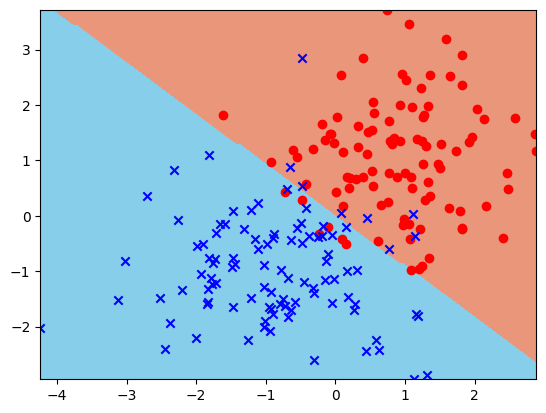

In [26]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-1,-1],[[1,0],[0,1]], [1, 1],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

# Test sur des données jouets
#####################################################
## A compléter

adaline = ClassifierADALINE(2, 1e-3, True, 200)
adaline.train(X, Y)

##################################################### 

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X, Y, adaline,step=150)
ut.plot2DSet(X, Y)

print("Accuracy finale : ", adaline.accuracy(X,Y))

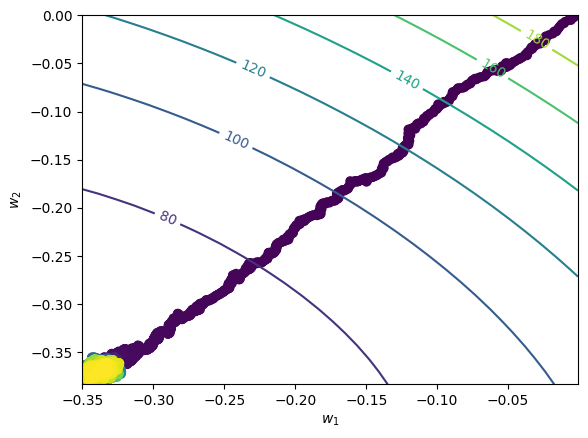

In [27]:
# Visualisation de la descente de gradient

allw = np.array(adaline.allw)

# construction d'une grille de 'toutes' les valeurs possibles de w
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# evaluation du cout pour toutes ces solutions potentielles

##########
# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid
res = np.zeros(len(grid))
for i in range(len(grid)):
    w = grid[i]
    res[i] = np.sum((np.dot(X, w) - Y) ** 2)
res=res.reshape(x1grid.shape)

#####################################################
fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

#plt.savefig("out/espace_param_MC.png")

## ADALINE analytique

<div class="alert alert-block alert-info">

Contrairement au perceptron, il est possible de calculer une solution analytique pour ADALINE. En effet, on peut montrer que l'annulation du gradient correspond au problème suivant:

$$ \underbrace{X^T X}_{\in \mathbb R^{d \times d}} \ \underbrace{\mathbf w}_{\in \mathbb R^{d}} = \underbrace{X^T Y}_{\in \mathbb R^{d}}$$

La fonction ```np.linalg.solve``` permet justement de résoudre un tel système d'équations linéaires.

1. Utiliser la documentation pour appliquer ```np.linalg.solve``` sur le problème qui nous intéresse et vérifier que la solution est bien intéressante.
1. Ecrire la classe `ClassifierADALINE2` qui implémente le classifieur ADALINE utilisant cette approche pour calculer la solution analytique.
1. Une fois fonctionnel, intégrer ce code dans le fichier ```Classifiers.py```
    
**Note:** cet algorithme n'est plus itératif, il n'y a plus de ```learning_rate``` ni d'itération max ou d'historique...
    
</div>

In [7]:
# code de la classe ADALINE Analytique

class ClassifierADALINE2(ClassifierADALINE):
    def __init__(self,input_dimension):
        self.w = None
    
    def train(self, X, Y):
        self.w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))

Résultat en 0.009355 secondes
Accuracy finale :  0.93


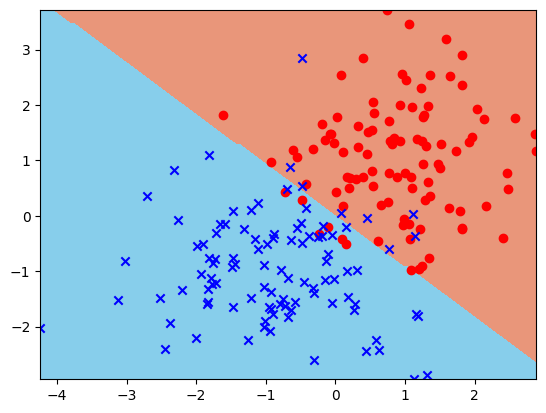

In [10]:
# reTest sur des données jouets
adaline2 = ClassifierADALINE2(2) 

# n'hésitez pas à jouer sur les paramètres

tic= time.time()
adaline2.train(X, Y)
toc= time.time()

print(f"Résultat en {(toc-tic):.4} secondes")
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X, Y,adaline2,step=150)
ut.plot2DSet(X, Y)

print("Accuracy finale : ", adaline2.accuracy(X,Y))
# Comparer le résultat avec celui obtenu avec adaline.

## Expérimentations 


<font color="RED" size="+1"><b>[Q]</b></font> Proposer un ensemble d'expérimentations sur les données USPS (en choisissant 2 classes pour en faire un problème de classification binaire) afin de comparer les 3 classifiers `ClassifierPerceptron`, `ClassifierPerceptronBiais` et `ClassifierAdaline`.

Remarque: une bonne comparaison étudie différents aspects: accuracy train/test, variance de l'accuracy, mais aussi vitesse de convergence de l'algorithme.

# Visualisation des données (suite)

Lorsque les données sur lesquelles on travaille possèdent plus de 2 dimensions, il n'est pas facile de les visualiser simplement comme on a pu le faire dans les séances précédentes en utilisant un plot.

Une façon de mieux visualiser ces données peut être d'utiliser les outils d'un package de visualisation.

Le package <code>seaborn</code> est très pratique (vous pouvez consulter la documentation sur le web) et généralement installé dans l'environnement Python. Pour l'installer, utiliser `pip` comme indiqué dans des TME précédents.

In [11]:
# Importation du package seaborn:
import seaborn as sns

In [12]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Un autre exemple d'utilisation:

autre_desc, autre_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]), \
                                                     np.array([-1,-1]),np.array([[1,0],[0,1]]),\
                                                     200)

# On commence par créer un dataframe avec les descriptions :
df = pd.DataFrame(autre_desc, columns= ["X", "Y"])

# puis on rajoute au dataframe une nouvelle colonne contenant les labels de chaque exemple :
df['label'] = autre_label

# Affichage du dataframe obtenu:
df

,X,Y,label
0,-0.503286,-1.138264,-1
1,-0.352311,0.523030,-1
2,-1.234153,-1.234137,-1
3,0.579213,-0.232565,-1
4,-1.469474,-0.457440,-1
...,...,...,...
395,1.429618,1.207688,1
396,1.271579,-0.276749,1
397,-0.081057,2.053153,1
398,0.960445,1.681501,1


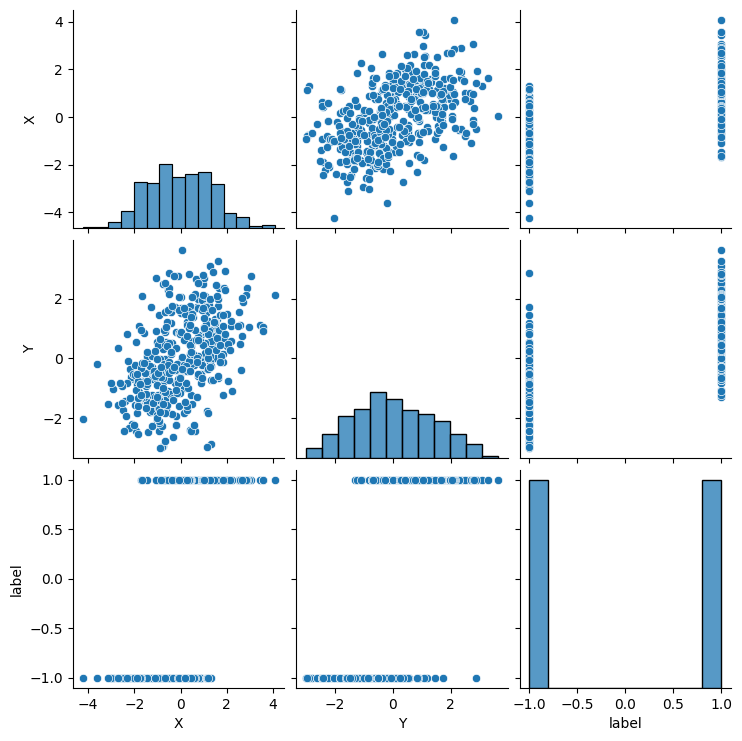

In [13]:
sns.pairplot(df)

# Eventuellement, mais pas nécessairement utile:
#sns.plt.show()

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `cree_dataframe()` qui, étant donné un dataset (un tuple contenant un array avec les description et un array avec les labels correspondant) et une liste de chaîne de caractères donnant les noms des variables correspondant à chaque colonne de la description, ainsi qu'une chaîne de caractères donnant le nom pour la colonne label à donner dans le dataframe créé (ce dernier argument étant optionnel et mis à la chaîne "label" par défaut), rend le dataframe correspondant.

In [16]:
# ------------------------ A COMPLETER :
def cree_dataframe(DS, L_noms, Nom_label = "label"):
    """ Dataset * List[str] * Str -> DataFrame
        Hypothèse: la liste a autant de chaînes que la description a de colonnes
    """
    descriptions, labels = DS
    data = {name: descriptions[:, i] for i, name in enumerate(L_noms)}
    data[Nom_label] = labels

    df = pd.DataFrame(data)
    return df


In [17]:
cree_dataframe((autre_desc,autre_label),["X", "Y"])

,X,Y,label
0,-0.503286,-1.138264,-1
1,-0.352311,0.523030,-1
2,-1.234153,-1.234137,-1
3,0.579213,-0.232565,-1
4,-1.469474,-0.457440,-1
...,...,...,...
395,1.429618,1.207688,1
396,1.271579,-0.276749,1
397,-0.081057,2.053153,1
398,0.960445,1.681501,1


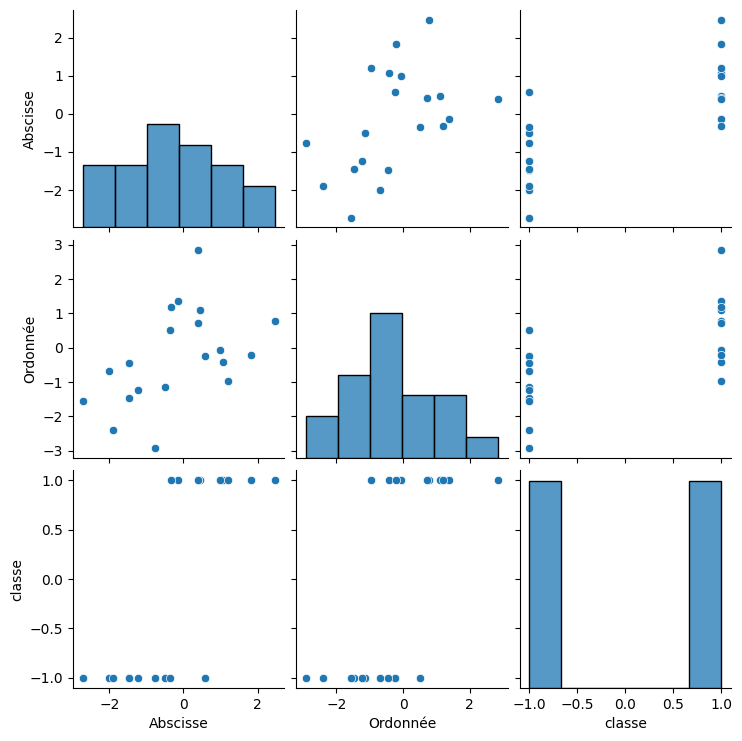

In [18]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

data_desc, data_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]), \
                                                   np.array([-1,-1]),np.array([[1,0],[0,1]]),\
                                                   10)

df_data = cree_dataframe((data_desc,data_label),["Abscisse", "Ordonnée"], 'classe')

sns.pairplot(df_data)

## Expérimentations sur les Iris de Fisher

Un autre exemple, qui utilise un dataset classique en apprentissage: le dataset des iris de Fisher  vu dans le cours 6 (voir aussi par exemple : https://fr.wikipedia.org/wiki/Iris_de_Fisher) dont les exemples sont décrits par 4 variables et sont associés à l'une des 3 classes possibles ('setosa', 'virginica' et 'versicolor'). La classe est donnée dans la colonne 'species' du dataframe.


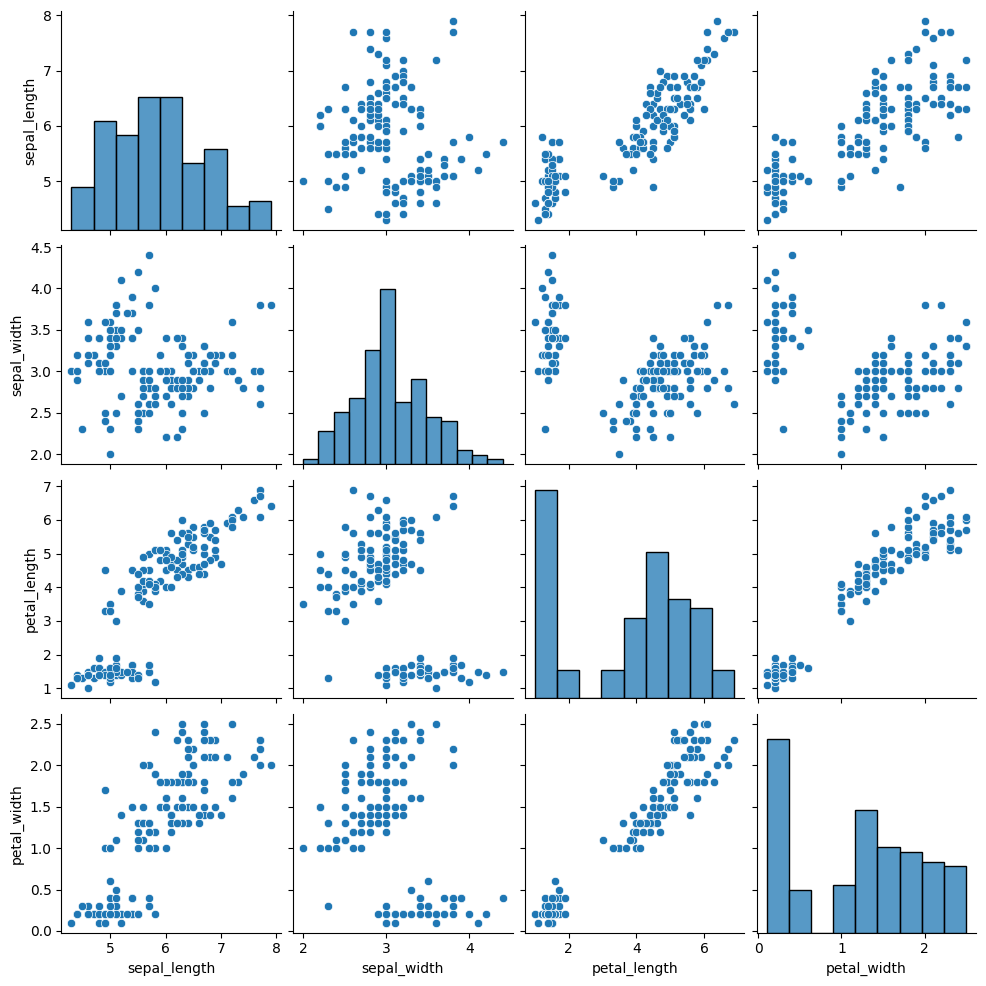

In [19]:
# Le dataset des iris est fourni dans le package seaborn, on l'obtient ainsi:
df_iris = sns.load_dataset('iris')

# On peut alors construire le corrélogramme de ce dataset:
sns.pairplot(df_iris)

In [20]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
df_iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

<font color="RED" size="+1">**[Q]**</font> Utiliser le package `seaborn` ainsi que les autres fonctions de visualisation pour afficher tout un ensemble de résultats permettant d'analyser la base des Iris de Fisher. 

<font color="RED" size="+1">**[Q]**</font> Mettre au point une série d'expérimentations pour tester les algorithmes implémentés sur la base des iris en utilisant leur version multiclasse.